# Problem Defination: 

Predict the survival rate of breast cancer patients based on socio-economic and health-related features.

# Data Processing and EDA

In [1]:
import pandas as pd

# Load the dataset (adjust the path if needed)
data = pd.read_csv('/kaggle/input/breast-cancer-global-dataset/Breast_Cancer_Global_Dataset.csv')
df=data

# Check the first few rows to verify the data
print(data.head())


          Country         Region HDI_Category  Population  Screening_Rate  \
0  United Kingdom           Asia         High   191540888           66.17   
1         Nigeria  North America         High   129793398           63.18   
2    Saudi Arabia         Africa          Low     3532234           12.91   
3       Australia  South America          Low    41960151           12.64   
4          France  South America       Medium    96709040           44.87   

   Median_Age  Urbanization_Rate  Healthcare_Expenditure  GDP_Per_Capita  \
0          33              67.05                    5873           13759   
1          30              65.86                     604           35571   
2          42              69.01                    9138           37653   
3          38              26.66                    3767            1947   
4          42              41.22                    4364           12059   

   Obesity_Rate  ...  Average_Diagnosis_Age  Survival_Rate  Access_To_Care  \
0 

In [2]:
import sklearn
print(sklearn.__version__)


1.2.2


In [3]:
print(df.shape)
print(df.info())



(1989170, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989170 entries, 0 to 1989169
Data columns (total 25 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Country                 object 
 1   Region                  object 
 2   HDI_Category            object 
 3   Population              int64  
 4   Screening_Rate          float64
 5   Median_Age              int64  
 6   Urbanization_Rate       float64
 7   Healthcare_Expenditure  int64  
 8   GDP_Per_Capita          int64  
 9   Obesity_Rate            float64
 10  Smoking_Rate            float64
 11  Alcohol_Consumption     float64
 12  Physical_Activity_Rate  float64
 13  Family_History_Rate     float64
 14  Breastfeeding_Rate      float64
 15  Average_Diagnosis_Age   int64  
 16  Survival_Rate           float64
 17  Access_To_Care          float64
 18  Education_Level         object 
 19  Women_Population        int64  
 20  Breast_Cancer_Cases     int64  
 21  Breast_Cancer_Dea

In [4]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Population,1989170.0,1.004545e+08,5.744319e+07,1000079.00,50664627.50,1.004995e+08,1.501670e+08,2.000000e+08
Screening_Rate,1989170.0,5.001310e+01,2.308906e+01,10.00,30.03,5.002000e+01,6.999000e+01,9.000000e+01
Median_Age,1989170.0,3.450089e+01,8.657112e+00,20.00,27.00,3.500000e+01,4.200000e+01,4.900000e+01
Urbanization_Rate,1989170.0,5.500497e+01,2.021857e+01,20.00,37.49,5.500000e+01,7.254000e+01,9.000000e+01
Healthcare_Expenditure,1989170.0,5.046636e+03,2.857664e+03,100.00,2572.00,5.046000e+03,7.519000e+03,9.999000e+03
GDP_Per_Capita,1989170.0,2.550817e+04,1.414696e+04,1000.00,13260.00,2.550600e+04,3.775200e+04,4.999900e+04
Obesity_Rate,1989170.0,2.750320e+01,1.299669e+01,5.00,16.23,2.750000e+01,3.876000e+01,5.000000e+01
Smoking_Rate,1989170.0,2.249372e+01,1.010476e+01,5.00,13.75,2.249000e+01,3.124000e+01,4.000000e+01
Alcohol_Consumption,1989170.0,7.498512e+00,4.327977e+00,0.00,3.75,7.500000e+00,1.125000e+01,1.500000e+01
Physical_Activity_Rate,1989170.0,5.001067e+01,1.731765e+01,20.00,35.02,5.002000e+01,6.501000e+01,8.000000e+01


**Checking the Null Value of the Dataset**

In [5]:
print(df.isnull().sum())


Country                   0
Region                    0
HDI_Category              0
Population                0
Screening_Rate            0
Median_Age                0
Urbanization_Rate         0
Healthcare_Expenditure    0
GDP_Per_Capita            0
Obesity_Rate              0
Smoking_Rate              0
Alcohol_Consumption       0
Physical_Activity_Rate    0
Family_History_Rate       0
Breastfeeding_Rate        0
Average_Diagnosis_Age     0
Survival_Rate             0
Access_To_Care            0
Education_Level           0
Women_Population          0
Breast_Cancer_Cases       0
Breast_Cancer_Deaths      0
Cases_Per_100K            0
Deaths_Per_100K           0
Mortality_Rate            0
dtype: int64


# Feature Engineering

In this Feature Engineering, We have dropped the columns that are not useful in the further analysis like "Country" and "Region".
 Here we have also converted the variables to numerical using encoding.

In [6]:
# Drop categorical columns that are not useful for ML
df_cleaned = df.drop(columns=['Country', 'Region'])  # These are not useful for predictions

# Convert categorical variables to numerical using encoding
df_cleaned = pd.get_dummies(df_cleaned, columns=['HDI_Category', 'Education_Level'], drop_first=True)

# Check data types again
print(df_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989170 entries, 0 to 1989169
Data columns (total 25 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Population                 int64  
 1   Screening_Rate             float64
 2   Median_Age                 int64  
 3   Urbanization_Rate          float64
 4   Healthcare_Expenditure     int64  
 5   GDP_Per_Capita             int64  
 6   Obesity_Rate               float64
 7   Smoking_Rate               float64
 8   Alcohol_Consumption        float64
 9   Physical_Activity_Rate     float64
 10  Family_History_Rate        float64
 11  Breastfeeding_Rate         float64
 12  Average_Diagnosis_Age      int64  
 13  Survival_Rate              float64
 14  Access_To_Care             float64
 15  Women_Population           int64  
 16  Breast_Cancer_Cases        int64  
 17  Breast_Cancer_Deaths       int64  
 18  Cases_Per_100K             float64
 19  Deaths_Per_100K            float64
 20  Mo

In [7]:
unique= df_cleaned['HDI_Category_Low'].unique()
print(unique)

[False  True]


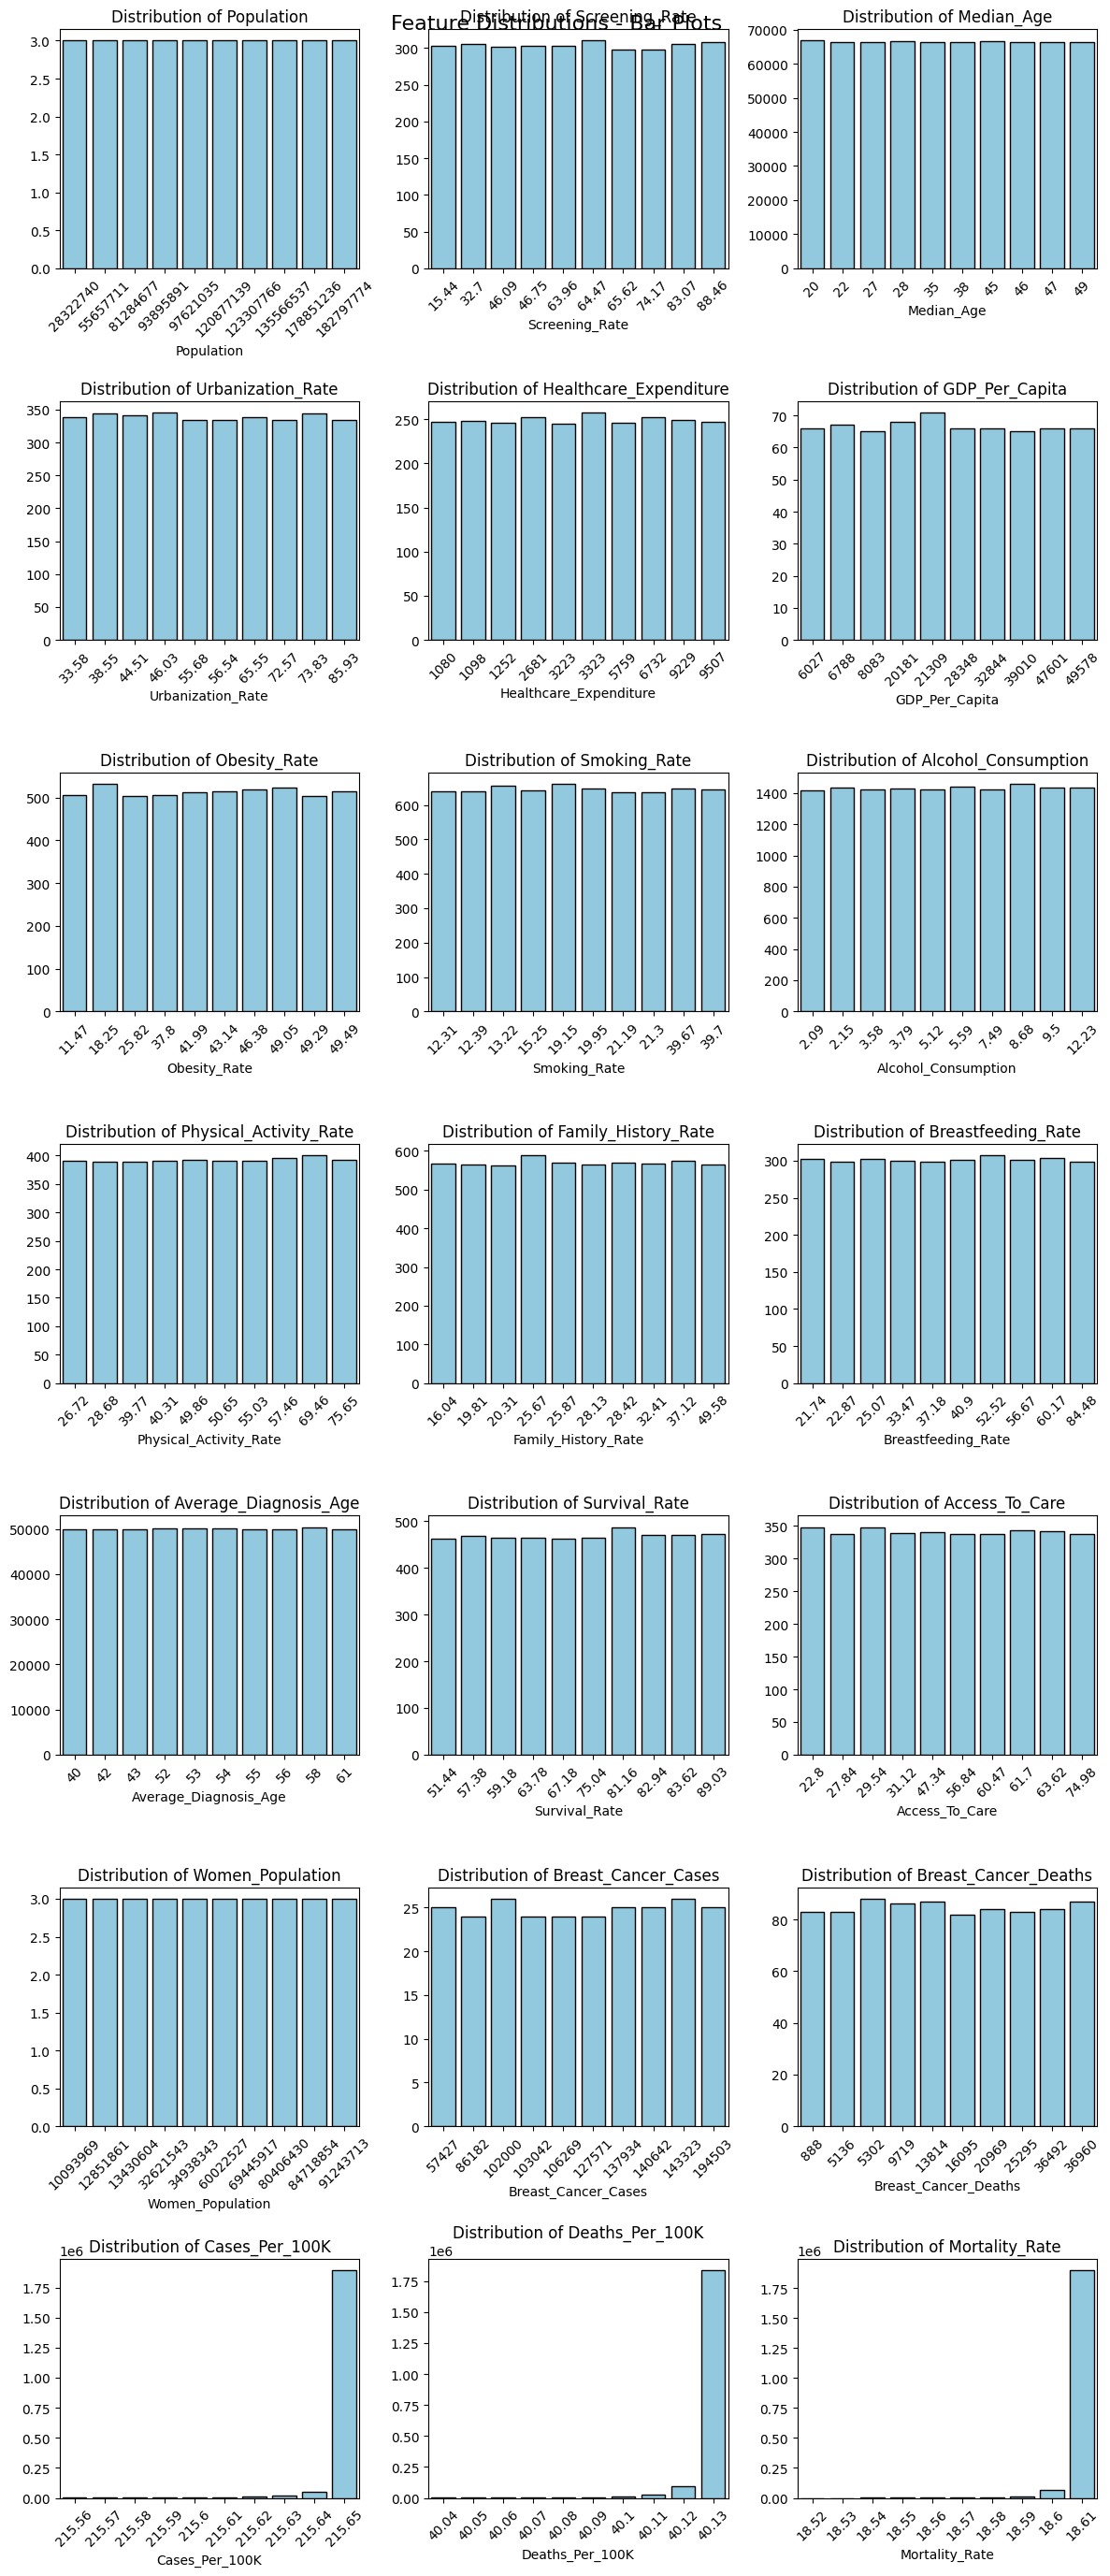

In [8]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical features
numeric_features = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Define subplot grid size dynamically
num_features = len(numeric_features)
num_rows = math.ceil(num_features / 3)  # Adjust rows automatically

plt.figure(figsize=(12, 4 * num_rows))  # Adjust figure size dynamically

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(num_rows, 3, i)  # Adjusted grid size
    sns.barplot(x=df_cleaned[feature].value_counts().index[:10], 
                y=df_cleaned[feature].value_counts().values[:10], 
                color="skyblue", edgecolor="black")
    plt.title(f"Distribution of {feature}")
    plt.xticks(rotation=45)  # Rotate for better visibility

plt.suptitle("Feature Distributions - Bar Plots", fontsize=16)
plt.tight_layout()
plt.show()


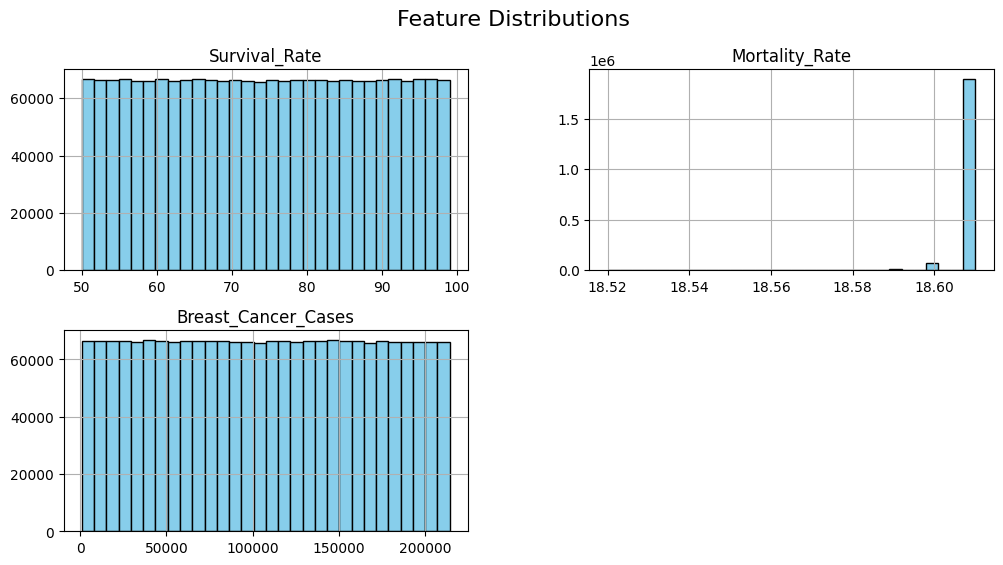

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Histograms & KDE Plots
features_to_plot = ['Survival_Rate', 'Mortality_Rate', 'Breast_Cancer_Cases']
df_cleaned[features_to_plot].hist(figsize=(12, 6), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


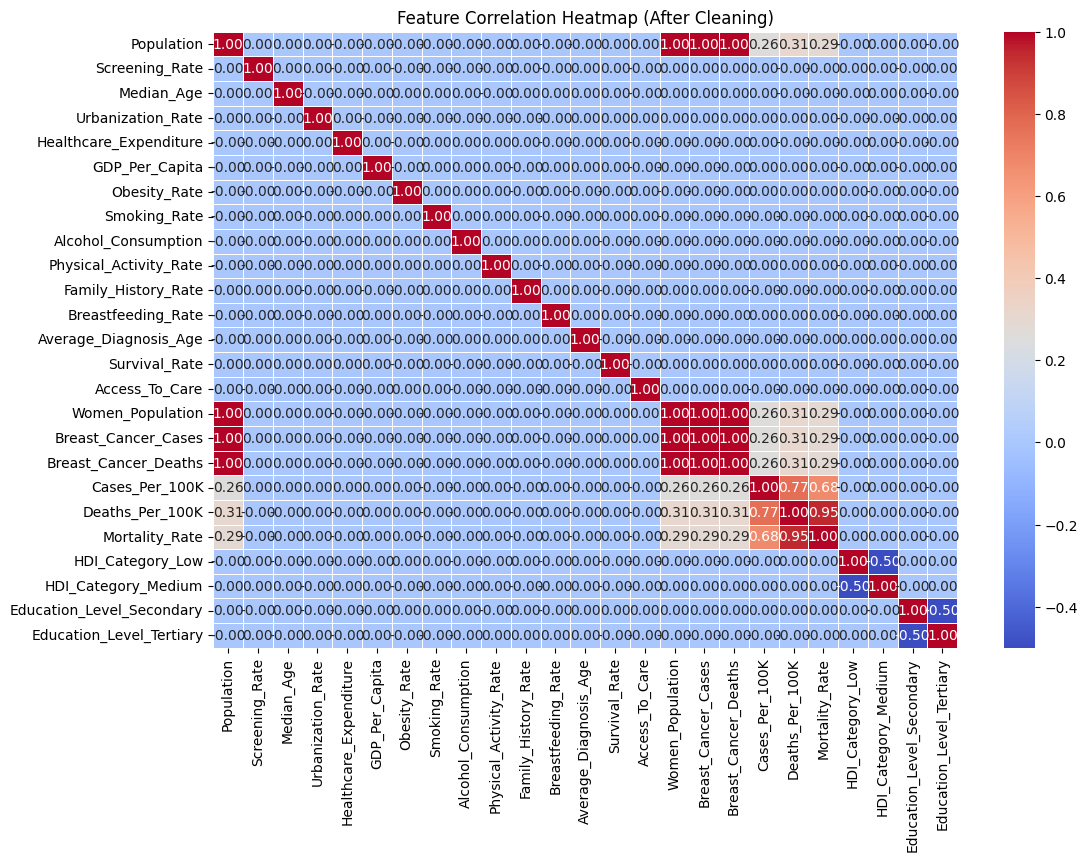

In [10]:
# Correlation heatmap after removing non-numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (After Cleaning)")
plt.show()


In [11]:
# Drop unnecessary columns
#df_cleaned = df.drop(columns=["Country", "Region", "Education_Level", 
#                              "Women_Population", "Breast_Cancer_Cases", 
#                              "Breast_Cancer_Deaths", "Cases_Per_100K"])

# Show updated columns
print("Remaining columns after cleaning:", df_cleaned.info)

#df.drop_duplicates(inplace=True)

# 4️⃣ Standardize column names (optional but recommended)
#df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# 5️⃣ Confirm cleaning
print("✅ Data Cleaning Done!")
print(df_cleaned.info())



Remaining columns after cleaning: <bound method DataFrame.info of          Population  Screening_Rate  Median_Age  Urbanization_Rate  \
0         191540888           66.17          33              67.05   
1         129793398           63.18          30              65.86   
2           3532234           12.91          42              69.01   
3          41960151           12.64          38              26.66   
4          96709040           44.87          42              41.22   
...             ...             ...         ...                ...   
1989165   188110940           43.52          35              27.84   
1989166    10939787           35.49          41              77.07   
1989167    15240591           80.23          32              25.29   
1989168   150476874           17.19          42              78.31   
1989169    30377158           48.22          24              33.22   

         Healthcare_Expenditure  GDP_Per_Capita  Obesity_Rate  Smoking_Rate  \
0             

# Slipting data into Train Test

In [12]:
# Define features and target variable
X = df_cleaned.drop(columns=['Survival_Rate'])  # Drop target column from features
y = df_cleaned['Survival_Rate']  # Target variable


In [13]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
import pandas as pd

# Convert to DataFrame
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Save to CSV (without index)
train_data.to_csv("train.csv", index=False)
test_data.to_csv("test.csv", index=False)


In [15]:
import pandas as pd

# Load datasets
train_data = pd.read_csv("/kaggle/working/test.csv")  # Adjust path as needed
test_data = pd.read_csv("/kaggle/working/test.csv")

# Split into X (features) and y (target)
X_train = train_data.drop(columns=['Survival_Rate'])
y_train = train_data['Survival_Rate']

X_test = test_data.drop(columns=['Survival_Rate'])
y_test = test_data['Survival_Rate']


In [16]:
print(df_cleaned.columns)


Index(['Population', 'Screening_Rate', 'Median_Age', 'Urbanization_Rate',
       'Healthcare_Expenditure', 'GDP_Per_Capita', 'Obesity_Rate',
       'Smoking_Rate', 'Alcohol_Consumption', 'Physical_Activity_Rate',
       'Family_History_Rate', 'Breastfeeding_Rate', 'Average_Diagnosis_Age',
       'Survival_Rate', 'Access_To_Care', 'Women_Population',
       'Breast_Cancer_Cases', 'Breast_Cancer_Deaths', 'Cases_Per_100K',
       'Deaths_Per_100K', 'Mortality_Rate', 'HDI_Category_Low',
       'HDI_Category_Medium', 'Education_Level_Secondary',
       'Education_Level_Tertiary'],
      dtype='object')


In [17]:
# Import essential libraries
import numpy as np
import pandas as pd

# Import ML models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.cluster import KMeans

# Import evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [18]:
# Top 10 features from your Random Forest importance chart
top_10_features = [
    "GDP_Per_Capita",
    "Healthcare_Expenditure",
    "Screening_Rate",
    "Obesity_Rate",
    "Access_To_Care",
    "Urbanization_Rate",
    "Physical_Activity_Rate",
    "Family_History_Rate",
    "Breastfeeding_Rate",
    "Alcohol_Consumption"
]

# Create reduced training/testing sets
X_train_reduced = X_train[top_10_features]
X_test_reduced = X_test[top_10_features]

print("Reduced feature set shape:", X_train_reduced.shape, X_test_reduced.shape)


Reduced feature set shape: (397834, 10) (397834, 10)


In [19]:
import os
import joblib
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model_dir = "/kaggle/working/saved_models"
os.makedirs(model_dir, exist_ok=True)

# Initialize Linear Regression
lr_model_10 = LinearRegression()

# Perform 5-Fold Cross-Validation
cv_results = cross_val_score(lr_model_10, X_train_reduced, y_train, cv=5, scoring="r2")

# Train on reduced training set
lr_model_10.fit(X_train_reduced, y_train)

# Predict on reduced test set
y_pred_lr = lr_model_10.predict(X_test_reduced)

# Evaluate
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression (Top 10) Cross-Validation Results:")
print(f"Mean R² (5-Fold): {np.mean(cv_results):.4f} ± {np.std(cv_results):.4f}")
print("Test Set Results:")
print(f"MAE: {lr_mae:.4f}")
print(f"MSE: {lr_mse:.4f}")
print(f"R² : {lr_r2:.4f}")

# Save model
model_path = os.path.join(model_dir, "LinearRegression_10.pkl")
joblib.dump(lr_model_10, model_path)
print(f"✅ LinearRegression_10 saved as {model_path}")


Linear Regression (Top 10) Cross-Validation Results:
Mean R² (5-Fold): -0.0000 ± 0.0000
Test Set Results:
MAE: 12.2404
MSE: 199.7846
R² : 0.0000
✅ LinearRegression_10 saved as /kaggle/working/saved_models/LinearRegression_10.pkl


In [20]:
import os
import joblib
import numpy as np
import gzip
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train model
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
cv_results = cross_val_score(rf_model, X_train_reduced, y_train, cv=3, scoring="r2")
rf_model.fit(X_train_reduced, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test_reduced)
metrics = {
    "MAE": mean_absolute_error(y_test, y_pred),
    "MSE": mean_squared_error(y_test, y_pred),
    "R²": r2_score(y_test, y_pred),
}

# Display results
print(f"Random Forest (Top 10) - CV R²: {np.mean(cv_results):.4f} ± {np.std(cv_results):.4f}")
print("\n".join(f"{k}: {v:.4f}" for k, v in metrics.items()))

# Save model with gzip compression
model_path = os.path.join(model_dir, "RandomForest_10.pkl.gz")
with gzip.open(model_path, "wb") as f:
    pickle.dump(rf_model, f)
    
print(f"✅ Compressed model saved as {model_path}")


Random Forest (Top 10) - CV R²: -0.1095 ± 0.0007
MAE: 4.9296
MSE: 39.4851
R²: 0.8024
✅ Compressed model saved as /kaggle/working/saved_models/RandomForest_10.pkl.gz


In [21]:
from sklearn.linear_model import Ridge

# Initialize Ridge
ridge_10 = Ridge(alpha=1.0)

# 5-Fold CV
cv_results = cross_val_score(ridge_10, X_train_reduced, y_train, cv=5, scoring="r2")

# Train
ridge_10.fit(X_train_reduced, y_train)

# Predict
ridge_preds = ridge_10.predict(X_test_reduced)

# Evaluate
ridge_mae = mean_absolute_error(y_test, ridge_preds)
ridge_mse = mean_squared_error(y_test, ridge_preds)
ridge_r2 = r2_score(y_test, ridge_preds)

print("Ridge Regression (Top 10) Cross-Validation Results:")
print(f"Mean R² (5-Fold): {np.mean(cv_results):.4f} ± {np.std(cv_results):.4f}")
print("Test Set Results:")
print(f"MAE: {ridge_mae:.4f}")
print(f"MSE: {ridge_mse:.4f}")
print(f"R² : {ridge_r2:.4f}")

# Save model
model_path = os.path.join(model_dir, "RidgeRegression_10.pkl")
joblib.dump(ridge_10, model_path)
print(f"✅ RidgeRegression_10 saved as {model_path}")


Ridge Regression (Top 10) Cross-Validation Results:
Mean R² (5-Fold): -0.0000 ± 0.0000
Test Set Results:
MAE: 12.2404
MSE: 199.7846
R² : 0.0000
✅ RidgeRegression_10 saved as /kaggle/working/saved_models/RidgeRegression_10.pkl


In [22]:
from sklearn.linear_model import ElasticNet

# Initialize ElasticNet
en_10 = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)

# 5-Fold CV
cv_results = cross_val_score(en_10, X_train_reduced, y_train, cv=5, scoring="r2")

# Train
en_10.fit(X_train_reduced, y_train)

# Predict
en_preds = en_10.predict(X_test_reduced)

# Evaluate
en_mae = mean_absolute_error(y_test, en_preds)
en_mse = mean_squared_error(y_test, en_preds)
en_r2 = r2_score(y_test, en_preds)

print("Elastic Net (Top 10) Cross-Validation Results:")
print(f"Mean R² (5-Fold): {np.mean(cv_results):.4f} ± {np.std(cv_results):.4f}")
print("Test Set Results:")
print(f"MAE: {en_mae:.4f}")
print(f"MSE: {en_mse:.4f}")
print(f"R² : {en_r2:.4f}")

# Save model
model_path = os.path.join(model_dir, "ElasticNet_10.pkl")
joblib.dump(en_10, model_path)
print(f"✅ ElasticNet_10 saved as {model_path}")


Elastic Net (Top 10) Cross-Validation Results:
Mean R² (5-Fold): -0.0000 ± 0.0000
Test Set Results:
MAE: 12.2405
MSE: 199.7888
R² : 0.0000
✅ ElasticNet_10 saved as /kaggle/working/saved_models/ElasticNet_10.pkl


In [23]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting
gb_10 = GradientBoostingRegressor(n_estimators=10, random_state=42)

# 5-Fold CV
cv_results = cross_val_score(gb_10, X_train_reduced, y_train, cv=5, scoring="r2")

# Train
gb_10.fit(X_train_reduced, y_train)

# Predict
gb_preds = gb_10.predict(X_test_reduced)

# Evaluate
gb_mae = mean_absolute_error(y_test, gb_preds)
gb_mse = mean_squared_error(y_test, gb_preds)
gb_r2 = r2_score(y_test, gb_preds)

print("Gradient Boosting (Top 10) Cross-Validation Results:")
print(f"Mean R² (5-Fold): {np.mean(cv_results):.4f} ± {np.std(cv_results):.4f}")
print("Test Set Results:")
print(f"MAE: {gb_mae:.4f}")
print(f"MSE: {gb_mse:.4f}")
print(f"R² : {gb_r2:.4f}")

# Save model
model_path = os.path.join(model_dir, "GradientBoosting_10.pkl")
joblib.dump(gb_10, model_path)
print(f"✅ GradientBoosting_10 saved as {model_path}")


Gradient Boosting (Top 10) Cross-Validation Results:
Mean R² (5-Fold): -0.0000 ± 0.0000
Test Set Results:
MAE: 12.2389
MSE: 199.7376
R² : 0.0003
✅ GradientBoosting_10 saved as /kaggle/working/saved_models/GradientBoosting_10.pkl


In [24]:
from xgboost import XGBRegressor

# Initialize XGBoost
xgb_10 = XGBRegressor(n_estimators=10, random_state=42, verbosity=0)

# 5-Fold CV
cv_results = cross_val_score(xgb_10, X_train_reduced, y_train, cv=5, scoring="r2")

# Train
xgb_10.fit(X_train_reduced, y_train)

# Predict
xgb_preds = xgb_10.predict(X_test_reduced)

# Evaluate
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_r2 = r2_score(y_test, xgb_preds)

print("XGBoost (Top 10) Cross-Validation Results:")
print(f"Mean R² (5-Fold): {np.mean(cv_results):.4f} ± {np.std(cv_results):.4f}")
print("Test Set Results:")
print(f"MAE: {xgb_mae:.4f}")
print(f"MSE: {xgb_mse:.4f}")
print(f"R² : {xgb_r2:.4f}")

# Save model
model_path = os.path.join(model_dir, "XGBoost_10.pkl")
joblib.dump(xgb_10, model_path)
print(f"✅ XGBoost_10 saved as {model_path}")


XGBoost (Top 10) Cross-Validation Results:
Mean R² (5-Fold): -0.0011 ± 0.0002
Test Set Results:
MAE: 12.2066
MSE: 198.7665
R² : 0.0051
✅ XGBoost_10 saved as /kaggle/working/saved_models/XGBoost_10.pkl


In [25]:
from sklearn.neural_network import MLPRegressor

# Initialize MLP
mlp_10 = MLPRegressor(hidden_layer_sizes=(50,50), max_iter=500, random_state=42)

# 5-Fold CV
cv_results = cross_val_score(mlp_10, X_train_reduced, y_train, cv=5, scoring="r2")

# Train
mlp_10.fit(X_train_reduced, y_train)

# Predict
mlp_preds = mlp_10.predict(X_test_reduced)

# Evaluate
mlp_mae = mean_absolute_error(y_test, mlp_preds)
mlp_mse = mean_squared_error(y_test, mlp_preds)
mlp_r2 = r2_score(y_test, mlp_preds)

print("MLP Regressor (Top 10) Cross-Validation Results:")
print(f"Mean R² (5-Fold): {np.mean(cv_results):.4f} ± {np.std(cv_results):.4f}")
print("Test Set Results:")
print(f"MAE: {mlp_mae:.4f}")
print(f"MSE: {mlp_mse:.4f}")
print(f"R² : {mlp_r2:.4f}")

# Save model
model_path = os.path.join(model_dir, "MLPRegressor_10.pkl")
joblib.dump(mlp_10, model_path)
print(f"✅ MLPRegressor_10 saved as {model_path}")


MLP Regressor (Top 10) Cross-Validation Results:
Mean R² (5-Fold): -0.0039 ± 0.0040
Test Set Results:
MAE: 12.2592
MSE: 200.6612
R² : -0.0044
✅ MLPRegressor_10 saved as /kaggle/working/saved_models/MLPRegressor_10.pkl


# Model Interpretation and Explainability

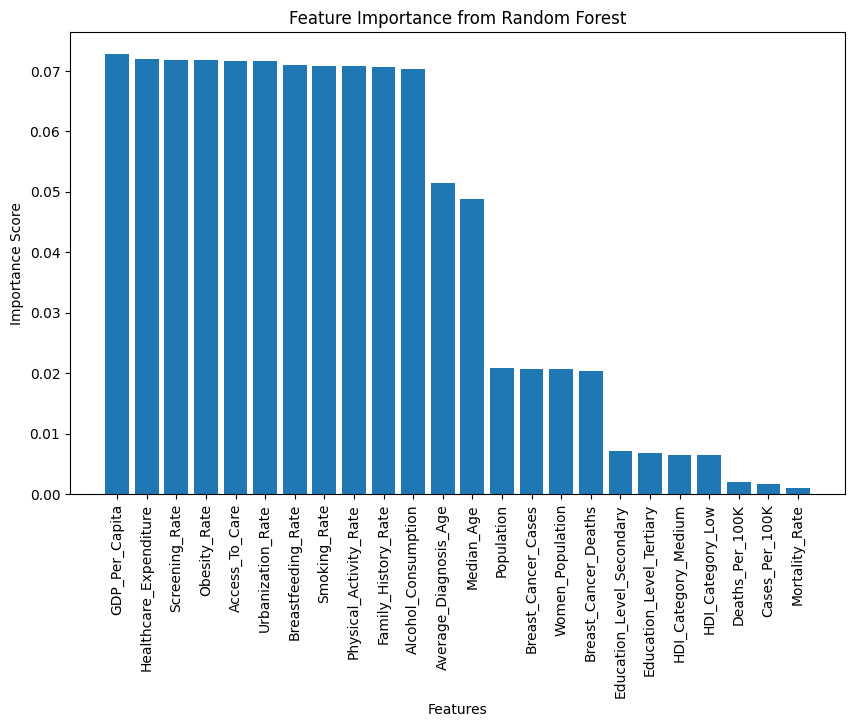

In [26]:
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Define the best model (Random Forest, since it had the highest R² score)
    best_model = RandomForestRegressor(n_estimators=10, random_state=42)
    best_model.fit(X_train, y_train)  # Train it again to ensure it's defined
    
    # Get feature importance
    importances = best_model.feature_importances_  
    feature_names = X_train.columns  
    
    # Sort features by importance
    sorted_indices = np.argsort(importances)[::-1]
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(importances)), importances[sorted_indices], align="center")
    plt.xticks(range(len(importances)), np.array(feature_names)[sorted_indices], rotation=90)
    plt.xlabel("Features")
    plt.ylabel("Importance Score")
    plt.title("Feature Importance from Random Forest")
    plt.show()  


In [27]:
print(X_train.dtypes)


Population                     int64
Screening_Rate               float64
Median_Age                     int64
Urbanization_Rate            float64
Healthcare_Expenditure         int64
GDP_Per_Capita                 int64
Obesity_Rate                 float64
Smoking_Rate                 float64
Alcohol_Consumption          float64
Physical_Activity_Rate       float64
Family_History_Rate          float64
Breastfeeding_Rate           float64
Average_Diagnosis_Age          int64
Access_To_Care               float64
Women_Population               int64
Breast_Cancer_Cases            int64
Breast_Cancer_Deaths           int64
Cases_Per_100K               float64
Deaths_Per_100K              float64
Mortality_Rate               float64
HDI_Category_Low                bool
HDI_Category_Medium             bool
Education_Level_Secondary       bool
Education_Level_Tertiary        bool
dtype: object


In [28]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Apply Label Encoding
encoder = LabelEncoder()
for col in categorical_cols:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])  # Apply same transformation


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 74.37430554382613
Prediction_local [75.03814782]
Right: 93.08800000000001


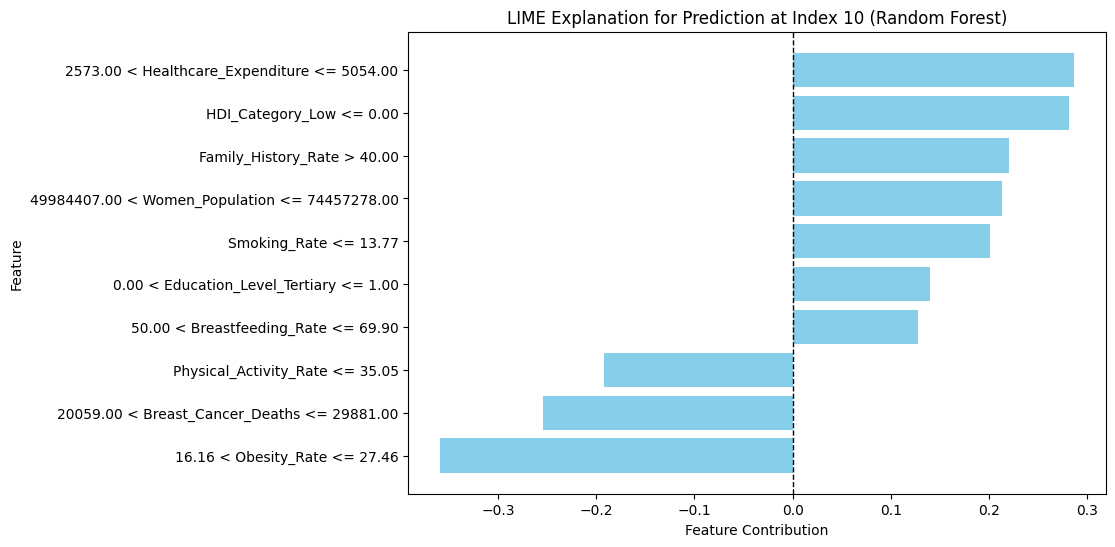

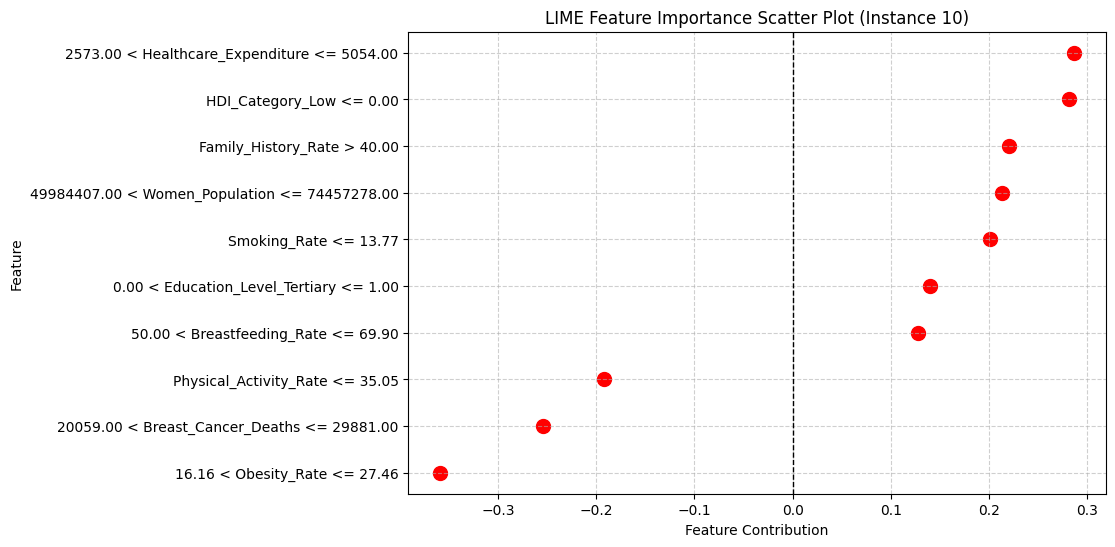

In [29]:
import numpy as np
import pandas as pd
import lime.lime_tabular
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Ensure the model is trained
if "best_model" not in globals():
    print("Training the Random Forest model...")
    best_model = RandomForestRegressor(n_estimators=10, random_state=42)
    best_model.fit(X_train, y_train)  # Train on full dataset

# Initialize LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,  
    feature_names=X_train.columns.tolist(),
    mode="regression",
    verbose=True,
    random_state=42
)

# Select a specific instance to analyze
instance_idx = 10  # Change this index as needed
instance = X_test.iloc[instance_idx]  # Extract test instance

# Generate LIME explanation using the Random Forest model
exp = explainer.explain_instance(
    instance.values,  
    best_model.predict  
)

# Extract LIME feature importance
lime_weights = dict(exp.as_list())
lime_df = pd.DataFrame(lime_weights.items(), columns=["Feature", "Importance"])
lime_df = lime_df.sort_values(by="Importance", ascending=True)  # Sort for better visualization

# **PLOT 1: Standard Bar Chart**
fig, ax = plt.subplots(figsize=(9, 6))
ax.barh(lime_df["Feature"], lime_df["Importance"], color="skyblue")
ax.set_xlabel("Feature Contribution")
ax.set_ylabel("Feature")
ax.set_title(f"LIME Explanation for Prediction at Index {instance_idx} (Random Forest)")
ax.axvline(x=0, color="black", linewidth=1, linestyle="--")  # Neutral reference line
plt.show()

# **PLOT 2: Scatter Plot of Feature Importance**
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(lime_df["Importance"], range(len(lime_df)), color="red", s=100)  # Scatter plot
ax.set_yticks(range(len(lime_df)))
ax.set_yticklabels(lime_df["Feature"])
ax.set_xlabel("Feature Contribution")
ax.set_ylabel("Feature")
ax.set_title(f"LIME Feature Importance Scatter Plot (Instance {instance_idx})")
plt.axvline(x=0, color="black", linewidth=1, linestyle="--")  # Neutral reference line
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


1️⃣ Screening Rate (High Importance)

Higher screening rates allow early detection, leading to earlier treatment and higher survival rates.
Countries with widespread screening programs generally have better outcomes.

2️⃣ Healthcare Expenditure

More spending means better hospitals, treatments, and access to care, which improves survival rates.

3️⃣ Obesity & Smoking Rates

Lifestyle factors directly impact cancer risks and treatment success.
High obesity/smoking rates may lower survival rates due to complications.

4️⃣ Family History & Diagnosis Age

A strong genetic link and early diagnosis can influence survival rates.
If diagnosed earlier, treatment success is generally higher.

Explaining instance at index 104532
Intercept 74.46588469631583
Prediction_local [74.71996555]
Right: 78.46099999999998


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


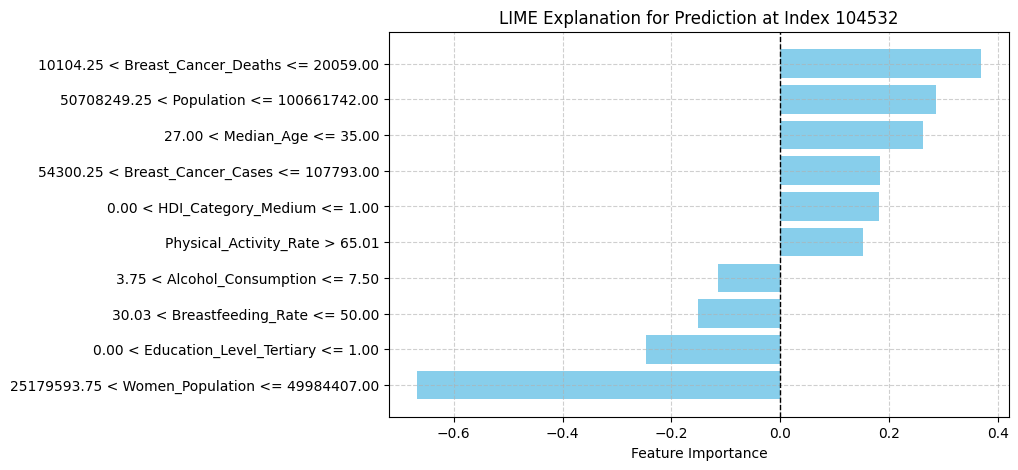

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Select a random test instance
instance_idx = np.random.randint(len(X_test))  # Randomly choose an index
instance = X_test.iloc[instance_idx]  # Extract instance data

print(f"Explaining instance at index {instance_idx}")

# Generate LIME explanation
exp = explainer.explain_instance(
    instance.values,  # Convert instance to NumPy array
    best_model.predict
)

# Display explanation (for Jupyter users)
exp.show_in_notebook()

# Extract feature importance
lime_weights = dict(exp.as_list())  # Convert to dictionary for easier handling
lime_df = pd.DataFrame(lime_weights.items(), columns=["Feature", "Importance"])
lime_df = lime_df.sort_values(by="Importance", ascending=True)  # Sort for better visualization

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(lime_df["Feature"], lime_df["Importance"], color="skyblue")
plt.xlabel("Feature Importance")
plt.title(f"LIME Explanation for Prediction at Index {instance_idx}")
plt.axvline(x=0, color="black", linewidth=1, linestyle="--")  # Neutral reference line
plt.grid(True, linestyle="--", alpha=0.6)  # Add grid for readability
plt.show()


In [31]:
import sklearn
print(sklearn.__version__)


1.2.2
